In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [32]:
df=pd.read_csv("NVDAFinal.csv")
df = df[4012:]
rollwin = 90
df

,Date,Open,High,Low,Close,Adj Close,Volume
4012,2/1/2015,5.032500,5.070000,4.952500,5.032500,4.836187,11368000
4013,5/1/2015,5.032500,5.047500,4.925000,4.947500,4.754501,19795200
4014,6/1/2015,4.955000,4.960000,4.792500,4.797500,4.610354,19776400
4015,7/1/2015,4.832500,4.875000,4.770000,4.785000,4.598342,32180800
4016,8/1/2015,4.840000,4.995000,4.837500,4.965000,4.771320,28378000
...,...,...,...,...,...,...,...
5973,17/10/2022,115.180000,119.480003,115.169998,118.879997,118.879997,58077400
5974,18/10/2022,123.440002,124.919998,116.180000,119.669998,119.669998,65936200
5975,19/10/2022,118.790001,123.500000,118.339996,120.510002,120.510002,52313100
5976,20/10/2022,121.129997,127.690002,121.050003,121.940002,121.940002,65239800


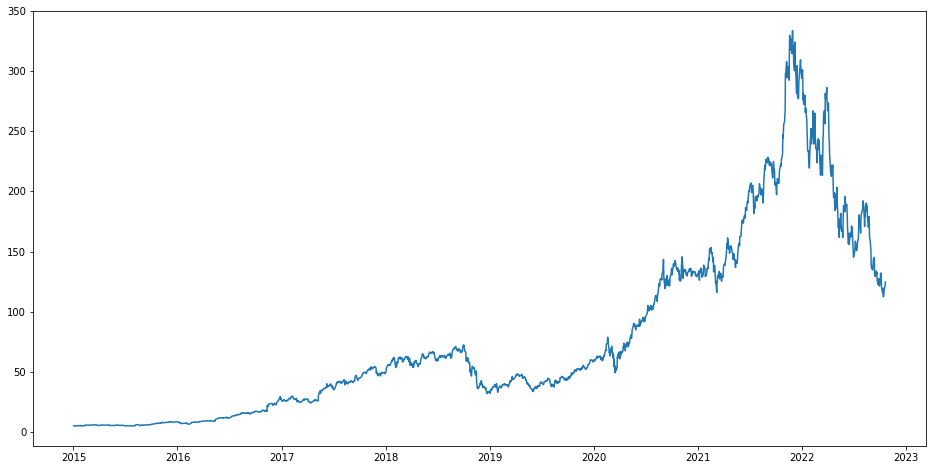

In [33]:
df["Date"]=pd.to_datetime(df.Date,format="%d/%m/%Y")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [34]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset

,Date,Close
0,2015-01-02 00:00:00,5.0325
1,2015-01-05 00:00:00,4.9475
2,2015-01-06 00:00:00,4.7975
3,2015-01-07 00:00:00,4.785
4,2015-01-08 00:00:00,4.965
...,...,...
1961,2022-10-17 00:00:00,118.879997
1962,2022-10-18 00:00:00,119.669998
1963,2022-10-19 00:00:00,120.510002
1964,2022-10-20 00:00:00,121.940002


In [35]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
findata = new_dataset

train_data=final_dataset       
#valid_data=final_dataset[987:,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)#array of just closing prices
scaled_data=scaler.fit_transform(findata)#change newdatasetvalues to 0:1, has date as index still

x_train_data,y_train_data=[],[]

for i in range(rollwin,len(train_data)):
    x_train_data.append(scaled_data[i-rollwin:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))#last 1 is z

print(x_train_data)

[[[7.52336781e-04]
  [4.93958492e-04]
  [3.79968071e-05]
  ...
  [1.28429208e-03]
  [1.13230485e-03]
  [1.28429208e-03]]

 [[4.93958492e-04]
  [3.79968071e-05]
  [0.00000000e+00]
  ...
  [1.13230485e-03]
  [1.28429208e-03]
  [1.37548442e-03]]

 [[3.79968071e-05]
  [0.00000000e+00]
  [5.47154022e-04]
  ...
  [1.28429208e-03]
  [1.37548442e-03]
  [1.63386271e-03]]

 ...

 [[5.01421081e-01]
  [4.61083658e-01]
  [4.66828775e-01]
  ...
  [3.26726936e-01]
  [3.46819647e-01]
  [3.49221049e-01]]

 [[4.61083658e-01]
  [4.66828775e-01]
  [4.87833419e-01]
  ...
  [3.46819647e-01]
  [3.49221049e-01]
  [3.51774446e-01]]

 [[4.66828775e-01]
  [4.87833419e-01]
  [4.59685357e-01]
  ...
  [3.49221049e-01]
  [3.51774446e-01]
  [3.56121281e-01]]]


In [36]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))#requires input dat in certain format thats why we reshape
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

1876/1876 - 73s - loss: 0.0015 - 73s/epoch - 39ms/step


In [37]:
inputs_data=new_dataset[len(new_dataset)-rollwin:].values
#a = np.append(inputs_data,valid_dataset,axis=0)
inputs_data

array([[165.270004],
       [156.009995],
       [158.800003],
       [165.660004],
       [163.600006],
       [162.25],
       [171.259995],
       [168.690002],
       [159.820007],
       [155.419998],
       [151.589996],
       [145.229996],
       [149.639999],
       [151.300003],
       [158.580002],
       [158.380005],
       [151.520004],
       [150.820007],
       [151.639999],
       [153.720001],
       [157.619995],
       [161.009995],
       [169.919998],
       [178.070007],
       [180.5],
       [173.190002],
       [170.240005],
       [165.330002],
       [177.899994],
       [179.839996],
       [181.630005],
       [184.410004],
       [185.259995],
       [188.929993],
       [192.149994],
       [189.889999],
       [177.929993],
       [170.860001],
       [180.970001],
       [179.419998],
       [187.089996],
       [190.320007],
       [188.789993],
       [183.350006],
       [187.729996],
       [178.490005],
       [170.339996],
       [171.809998],
 

In [38]:
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
inputs_data.shape[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


90

In [40]:
predicted = []
XXX = []

for i in range(rollwin,rollwin+10):
  YYY = []
  YYY.append(np.append(inputs_data[i-rollwin:rollwin,0],predicted[:]))
  YYY=np.array(YYY)

  YYY=np.reshape(YYY,(YYY.shape[0],YYY.shape[1],1))
  pcp=lstm_model.predict(YYY)
  predicted.append(pcp[0][0])
  print(predicted)


1/1 [==============================] - 2s 2s/step
[0.3355063]
1/1 [==============================] - 0s 31ms/step
[0.3355063, 0.33565837]
1/1 [==============================] - 0s 24ms/step
[0.3355063, 0.33565837, 0.33413285]
1/1 [==============================] - 0s 29ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364]
1/1 [==============================] - 0s 24ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364, 0.32873628]
1/1 [==============================] - 0s 28ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364, 0.32873628, 0.3255288]
1/1 [==============================] - 0s 26ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364, 0.32873628, 0.3255288, 0.32219446]
1/1 [==============================] - 0s 31ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364, 0.32873628, 0.3255288, 0.32219446, 0.31880775]
1/1 [==============================] - 0s 29ms/step
[0.3355063, 0.33565837, 0.33413285, 0.33168364, 0.32873628, 0.3255288, 0.32219446, 0.31880775, 0.31541088

In [41]:
pred=[]
for i in range(0,len(predicted)):
  pred.append(scaler.inverse_transform([[predicted[i]]])[0][0])
pred

[115.15818517274349,
 115.20821610385954,
 114.70635772604882,
 113.90062737508296,
 112.93101949842541,
 111.87584039566933,
 110.77892473132967,
 109.66478305367022,
 108.54729813722759,
 107.43440159541994]

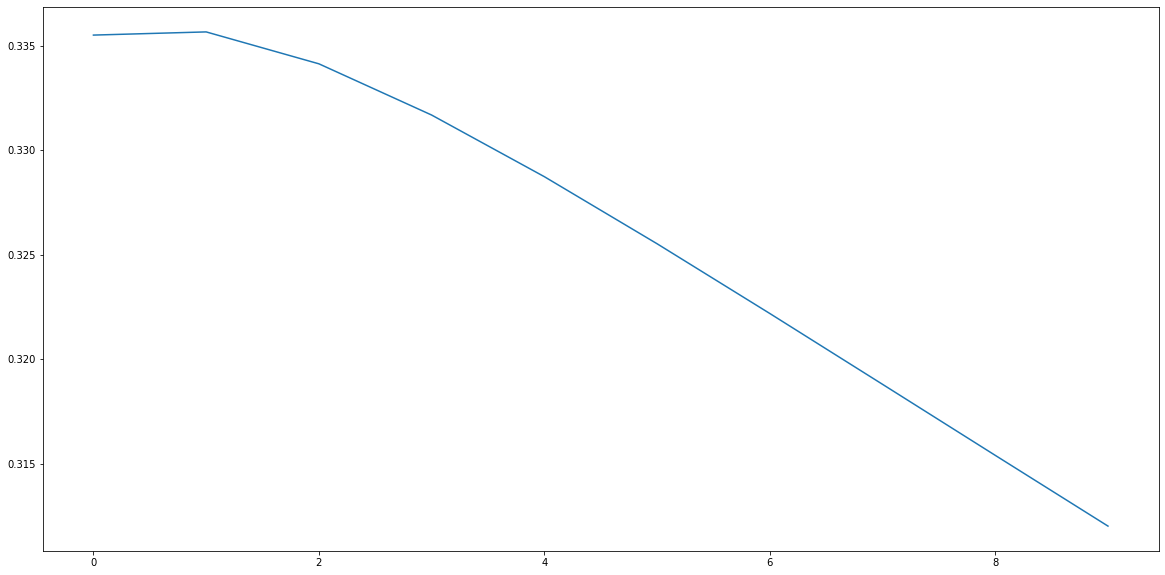

In [43]:
plt.plot(predicted)

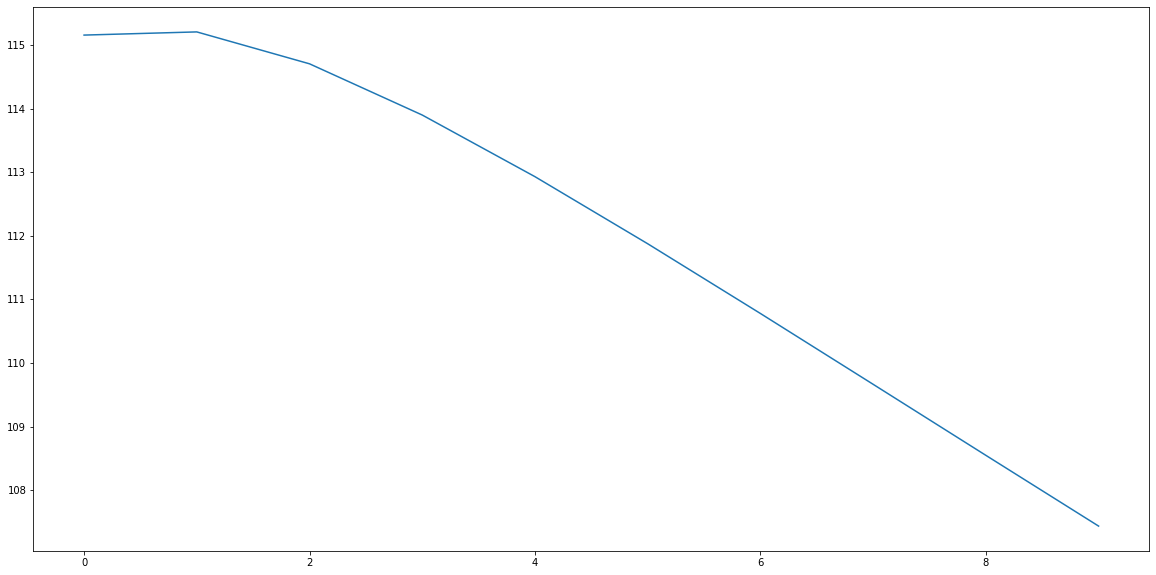

In [44]:
plt.plot(pred[0:10])

In [45]:
lstm_model.save("saved_model.h5")#know how to read models